# 연관규칙 ,연관성분석 (association analaysis) - 비지도 학습
### 대량의 데이터에 숨겨진 항목간의 연관규칙을 찾아내는 기법으로서  다른말로 장바구니 분석(market basket analysis)이라고도 한다.
### 실제 연관성 분석은 월마트, 아마존 등 여러기업에서 다양한 마케팅 활동에 활용하고 있으며 더 나아가 사회 네트워크 분석에도 활용할 수 있다.
### 빈발패턴 : 주어진 데이터 셋에서 빈발하게 발생하는 패턴을 찾아내는 기법
### 연관규칙 : 빈발패턴들 간의 연관성을 규칙으로 찾아내는 기법
### 장점
- 대규모 거래 데이터에 대해 작업을 할 수 있다.
- 이해하기 쉬운 규칙을 생성해준다.
- 데이터마이닝과 데이터 베이스에서 예상치 못한 지식을 발굴하는데 유용하다.

### 단점
- 작은 데이터셋에는 그다지 유용하지 않다
- 진정한 통찰력과 상식을 분리하기 위한 노력이 필요하다.
 
### 지지도(support) - 규칙의 중요성 - 필요조건
전체 거래중 연관성 규칙을 구성하는 항목들이 포함된 거래의 비율

support = 항목에 대한 거래수 / 전체 거래수  또는  A,B가 동시에 포함된 거래수 / 전체 거래수

### 신뢰도(confidence) - 규칙의 신뢰성 - 충분조건
항목 A를 포함하는 거래 중에서 항목 A와 항목 B가 같이 포함될 확률
연관성의 정도
             
confidence = 조건과 결과 항목을 동시에 포함하는 거래수 / 조건항목을 포함한 거래수  또는 A,B가 동시에 포함된 거래수 / A를 포함하는 거래수
                          
### 향상도(lift)
- 지지도와 신뢰도를 동시에 고려한다.
- 향상도 값이 1인 경우 조건과 결과는 우연에 의한 관계라고 보며 1보다 클수록 우연이 아닌 의미있는 연관성을 가진 규칙이라고 해석한다.
- '높은 상관 관계를 가진' 것들 만으로 추려내기 위한 지표
- 어떤 연관 규칙이 정말 연관성이 있는지 판단하려면 향상도가 1보다 큰 수치로 나타나야 함.
- 향상도 = A,B동시구매 비율 / A구매 비율*B구매 비율

lift(A -> B) = support(A -> B) / support(A) * support(B)

### 빈발항목중에서 후보집합을 선정하는 기준으로 지지도(Support) 를 사용

---

In [1]:
import pandas as pd

In [2]:
from apyori import apriori

baskets = [
    ['Milk', 'Tea', 'Cake'],
    ['Eggs', 'Tea', 'Cold Drink'],
    ['Milk', 'Eggs', 'Tea', 'Cold Drink'],
    ['Eggs', 'Cold Drink'],
    ['Juice']
]
association_result = list(apriori(baskets, min_support=0.4))

In [3]:
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)
for result in  association_result:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)
network_df.head(10)

,source,target,support
0,Cold Drink,Eggs,0.6
1,Cold Drink,Tea,0.4
2,Eggs,Tea,0.4
3,Tea,Milk,0.4


![edu1](images/edu1.png)

In [4]:
from apyori import apriori

baskets = [
    ['Milk', 'Tea', 'Cake'],
    ['Eggs', 'Tea', 'Cold Drink'],
    ['Milk', 'Eggs', 'Tea', 'Cold Drink'],
    ['Eggs', 'Cold Drink'],
    ['Juice']
]
association_result = list(apriori(baskets, min_support=0.6))

In [5]:
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)
for result in  association_result:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)
network_df.head(10)

,source,target,support
0,Cold Drink,Eggs,0.6


![edu1](images/edu2.png)

In [6]:
import csv
with open('data/basket.csv', 'r', encoding='utf-8') as cf:
    transactions = [] 
    r = csv.reader(cf)
    for row in r:
        transactions.append(row)

In [7]:
transactions

[[' 소주', '콜라', '와인'],
 [' 소주', '오렌지주스', '콜라'],
 [' 콜라', '맥주', '와인'],
 [' 소주', '콜라', '맥주'],
 [' 오렌지주스', '와인']]

In [8]:
from apyori import apriori
rules = apriori(transactions, min_support=0.1, min_confidence=0.1)  
results = list(rules)

In [9]:
print("lhs => rhs \t\tsupport \t\tconfidence \t\tlift")
for row in results:
    support = row[1]
    ordered_stat = row[2]
    for ordered_item in ordered_stat:
        lhs = [x for x in ordered_item[0]]
        rhs = [x for x in ordered_item[1]]
        confidence = ordered_item[2]
        lift = ordered_item[3]
        if len(lhs) == 1 and len(rhs) == 1 :
            print(lhs, " => ", rhs, "\t\t{:>5.4f}\t\t{:>5.4f}\t\t{:>5.4f}".format(support, confidence, lift))    

lhs => rhs 		support 		confidence 		lift
[' 소주']  =>  ['맥주'] 		0.2000		0.3333		0.8333
['맥주']  =>  [' 소주'] 		0.2000		0.5000		0.8333
[' 소주']  =>  ['오렌지주스'] 		0.2000		0.3333		1.6667
['오렌지주스']  =>  [' 소주'] 		0.2000		1.0000		1.6667
[' 소주']  =>  ['와인'] 		0.2000		0.3333		0.5556
['와인']  =>  [' 소주'] 		0.2000		0.3333		0.5556
[' 소주']  =>  ['콜라'] 		0.6000		1.0000		1.6667
['콜라']  =>  [' 소주'] 		0.6000		1.0000		1.6667
[' 오렌지주스']  =>  ['와인'] 		0.2000		1.0000		1.6667
['와인']  =>  [' 오렌지주스'] 		0.2000		0.3333		1.6667
[' 콜라']  =>  ['맥주'] 		0.2000		1.0000		2.5000
['맥주']  =>  [' 콜라'] 		0.2000		0.5000		2.5000
[' 콜라']  =>  ['와인'] 		0.2000		1.0000		1.6667
['와인']  =>  [' 콜라'] 		0.2000		0.3333		1.6667
['맥주']  =>  ['와인'] 		0.2000		0.5000		0.8333
['와인']  =>  ['맥주'] 		0.2000		0.3333		0.8333
['맥주']  =>  ['콜라'] 		0.2000		0.5000		0.8333
['콜라']  =>  ['맥주'] 		0.2000		0.3333		0.8333
['오렌지주스']  =>  ['콜라'] 		0.2000		1.0000		1.6667
['콜라']  =>  ['오렌지주스'] 		0.2000		0.3333		1.6667
['와인']  =>  ['콜라'] 		0.2000		0.3333		0.5556
['콜

In [10]:
print("lhs => rhs \t\tsupport \t\tconfidence \t\tlift")
for row in results:
    support = row[1]
    ordered_stat = row[2]
    for ordered_item in ordered_stat:
        lhs = [x for x in ordered_item[0]]
        rhs = [x for x in ordered_item[1]]
        confidence = ordered_item[2]
        lift = ordered_item[3]
        print(lhs, " => ", rhs, "\t\t{:>5.4f}\t\t{:>5.4f}\t\t{:>5.4f}".format(support, confidence, lift))
    print("-------------------------------------------------------------------------")

lhs => rhs 		support 		confidence 		lift
[]  =>  [' 소주'] 		0.6000		0.6000		1.0000
-------------------------------------------------------------------------
[]  =>  [' 오렌지주스'] 		0.2000		0.2000		1.0000
-------------------------------------------------------------------------
[]  =>  [' 콜라'] 		0.2000		0.2000		1.0000
-------------------------------------------------------------------------
[]  =>  ['맥주'] 		0.4000		0.4000		1.0000
-------------------------------------------------------------------------
[]  =>  ['오렌지주스'] 		0.2000		0.2000		1.0000
-------------------------------------------------------------------------
[]  =>  ['와인'] 		0.6000		0.6000		1.0000
-------------------------------------------------------------------------
[]  =>  ['콜라'] 		0.6000		0.6000		1.0000
-------------------------------------------------------------------------
[]  =>  [' 소주', '맥주'] 		0.2000		0.2000		1.0000
[' 소주']  =>  ['맥주'] 		0.2000		0.3333		0.8333
['맥주']  =>  [' 소주'] 		0.2000		0.5000		0.8333
---------------

In [11]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [12]:
dataset= [['양말','팬티','신발'],
         ['신발','바지','팬티','셔츠'],
         ['모자','양말','신발'],
         ['신발','바지','팬티','장갑']]

In [13]:
t = TransactionEncoder()
t_a = t.fit(dataset).transform(dataset)
print(type(t_a))
df = pd.DataFrame(t_a, columns = t.columns_)
df

<class 'numpy.ndarray'>


,모자,바지,셔츠,신발,양말,장갑,팬티
0,False,False,False,True,True,False,True
1,False,True,True,True,False,False,True
2,True,False,False,True,True,False,False
3,False,True,False,True,False,True,True


In [14]:
frequent = apriori(df, min_support=0.5, use_colnames=True)
frequent

,support,itemsets
0,0.50,(바지)
1,1.00,(신발)
2,0.50,(양말)
3,0.75,(팬티)
4,0.50,"(바지, 신발)"
5,0.50,"(팬티, 바지)"
6,0.50,"(신발, 양말)"
7,0.75,"(팬티, 신발)"
8,0.50,"(팬티, 바지, 신발)"


In [15]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent, metric='confidence', min_threshold=0.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(바지),(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
1,(신발),(바지),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
2,(팬티),(바지),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
3,(바지),(팬티),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
4,(신발),(양말),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
5,(양말),(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
6,(팬티),(신발),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
7,(신발),(팬티),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
8,"(팬티, 바지)",(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
9,"(팬티, 신발)",(바지),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5


https://patents.google.com/patent/KR101595961B1/ko

# 트위터 API로 연관 키워드 분석하기

### 바로가기

- [<Step1. API 호출> : 트위터 API로 데이터 가져오기](#<Step1.-API-호출>-:-트위터-API로-데이터-가져오기)
    - [API 데이터로 데이터 프레임 생성하기]
- [<Step2. 추출> : 키워드 추출](#<Step2.-추출>-:-키워드-추출)
    - [텍스트 데이터 전처리]
    - [nltk, konlpy를 이용한 키워드 추출]
- [<Step3. 분석> : 연관 분석을 이용한 키워드 분석](#<Step3.-분석>-:-연관-분석을-이용한-키워드-분석)
    - [연관 키워드 추출하기]
    - [단어 빈도 추출하기]
- [<Step4. 시각화> : 연관 키워드 네트워크 시각화](#<Step4.-시각화>-:-연관-키워드-네트워크-시각화)
    - [연관 키워드 네트워크 시각화]

-----

In [16]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. API 호출> : 트위터 API로 데이터 가져오기

### [API 데이터로 데이터 프레임 생성하기]

-----

##### 트위터 API 가져오기

In [17]:
import tweepy
import pandas as pd

# 발급 완료된 키를 {your_key} 대신 입력합니다.
CONSUMER_KEY = "RvnZeIl8ra88reu8fm23m0bST"
CONSUMER_SECRET = "wTRylK94GK2KmhZUnqXonDaIszwAsS6VPvpSsIo6EX5GQLtzQo"
ACCESS_TOKEN_KEY = "959614462004117506-dkWyZaO8Bz3ZXh73rspWfc1sQz0EnDU"
ACCESS_TOKEN_SECRET = "rxDWfg7uz1yXMTDwijz0x90yWhDAnmOM15R6IgC8kmtTe"

# 개인정보 인증을 요청하는 Handler입니다.
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# 인증 요청을 수행합니다.
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# twitter API를 사용하기 위한 준비입니다.
api = tweepy.API(auth)

-----

##### '코로나' 키워드 검색

In [18]:
keyword = "코로나"
tweets = api.search(keyword)
for tweet in tweets:
    print(tweet.text)
    print(tweet.entities['user_mentions'])
    print(tweet.entities['hashtags'])
    print(tweet.created_at)

RT @happy_CSR_: 해군 함정이 외딴 섬 주민들의 코로나19 백신 접종 장소로 활용된다. 해군은 11일 목포항 대불부두에서 코로나19 백신수송지원본부, 전라남도와 공동으로 한산도함(4500t급)을 동원한 도서지역 백신 접종 모의훈련을 한다.…
[{'screen_name': 'happy_CSR_', 'name': 'sora', 'id': 1232556677188112386, 'id_str': '1232556677188112386', 'indices': [3, 14]}]
[]
2021-06-11 08:35:18
RT @rifabooo: 가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플과 크림빵을 사오라고 연락해왔다 백신 부작용이? 돼지가? 되는 거였나?? 얀센과 치히로의 행방불명??? 인가????
[{'screen_name': 'rifabooo', 'name': '리파부', 'id': 824207453277581312, 'id_str': '824207453277581312', 'indices': [3, 12]}]
[]
2021-06-11 08:35:16
RT @Planet0259: 구킴 어쩔? 아 짜증나네..이게 아니지..나경원이 당대를 하면서 그저 매국당의 이미지로 역사 속으로 사라져야하는데..준석이 때문에 혼종이 되었어…일베매국당이 되버린거지..코로나 변이 처럼 매국변이가…아 자쟈스!
[{'screen_name': 'Planet0259', 'name': 'Planet 0259-S', 'id': 1177741215334158338, 'id_str': '1177741215334158338', 'indices': [3, 14]}]
[]
2021-06-11 08:35:15
RT @rifabooo: 가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플과 크림빵을 사오라고 연락해왔다 백신 부작용이? 돼지가? 되는 거였나?? 얀센과 치히로의 행방불명??? 인가????
[{'screen_name': 'rifabooo', 'name': '리파부', 'i

-----

##### 데이터 프레임 형태로 수집

In [19]:
# 크롤링된 데이터를 저장할 데이터 프레임입니다.
columns = ['created', 'tweet_text']
df = pd.DataFrame(columns=columns)

# twitter API를 사용하여 ‘손흥민’이 포함된 100페이지의 트윗들을 크롤링한 뒤, ‘text’, ‘created_at’ 정보를 데이터 프레임으로 저장합니다.
#for i in range(1,100):
tweets = api.search(keyword)
for tweet in tweets:
        tweet_text = tweet.text
        created = tweet.created_at
        row = [created, tweet_text]
        series = pd.Series(row, index=df.columns)
        df = df.append(series, ignore_index=True)
print("Get data complete..")

Get data complete..


In [20]:
df.to_csv("data/tweet_temp.csv", index=False)

-----

# <Step2. 추출> : 키워드 추출

### [텍스트 데이터 전처리]

In [21]:
df = pd.read_csv("data/tweet_temp.csv")
df.head()

,created,tweet_text
0,2021-06-11 08:35:18,RT @happy_CSR_: 해군 함정이 외딴 섬 주민들의 코로나19 백신 접종 장...
1,2021-06-11 08:35:16,RT @rifabooo: 가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플...
2,2021-06-11 08:35:15,RT @Planet0259: 구킴 어쩔? 아 짜증나네..이게 아니지..나경원이 당대...
3,2021-06-11 08:35:10,RT @rifabooo: 가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플...
4,2021-06-11 08:35:07,@writer_HSY_123 코로나 자가격리때문에..ㅋㅋ


In [22]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [23]:
# ‘tweet_text’ 피처에 이를 적용합니다.
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,2021-06-11 08:35:18,RT @happy_CSR_: 해군 함정이 외딴 섬 주민들의 코로나19 백신 접종 장...,해군 함정이 외딴 섬 주민들의 코로나 백신 접종 장소로 활용된다 해군은 일 목포...
1,2021-06-11 08:35:16,RT @rifabooo: 가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플...,가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플과 크림빵을 사오라고 ...
2,2021-06-11 08:35:15,RT @Planet0259: 구킴 어쩔? 아 짜증나네..이게 아니지..나경원이 당대...,구킴 어쩔 아 짜증나네이게 아니지나경원이 당대를 하면서 그저 매국당의 이미지로 ...
3,2021-06-11 08:35:10,RT @rifabooo: 가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플...,가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플과 크림빵을 사오라고 ...
4,2021-06-11 08:35:07,@writer_HSY_123 코로나 자가격리때문에..ㅋㅋ,코로나 자가격리때문에ㅋㅋ


-----

### [konlpy를 이용한 키워드 추출]

In [24]:
from konlpy.tag import Okt
from collections import Counter

# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "data/korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [25]:
# ‘ko_text’ 피처에 이를 적용합니다.
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(15, 4)


,created,tweet_text,ko_text,nouns
0,2021-06-11 08:35:18,RT @happy_CSR_: 해군 함정이 외딴 섬 주민들의 코로나19 백신 접종 장...,해군 함정이 외딴 섬 주민들의 코로나 백신 접종 장소로 활용된다 해군은 일 목포...,"[해군, 함정, 외딴, 주민, 코로나, 백신, 접종, 장소, 활용, 해군, 목포항,..."
1,2021-06-11 08:35:16,RT @rifabooo: 가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플...,가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플과 크림빵을 사오라고 ...,"[가족, 코로나, 백신, 부작용, 와플, 크림, 사오, 연락, 백신, 부작용, 돼지..."
2,2021-06-11 08:35:15,RT @Planet0259: 구킴 어쩔? 아 짜증나네..이게 아니지..나경원이 당대...,구킴 어쩔 아 짜증나네이게 아니지나경원이 당대를 하면서 그저 매국당의 이미지로 ...,"[구킴, 나경원, 당대, 매국, 이미지, 역사, 준석, 때문, 종이, 일베, 매국,..."
3,2021-06-11 08:35:10,RT @rifabooo: 가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플...,가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플과 크림빵을 사오라고 ...,"[가족, 코로나, 백신, 부작용, 와플, 크림, 사오, 연락, 백신, 부작용, 돼지..."
4,2021-06-11 08:35:07,@writer_HSY_123 코로나 자가격리때문에..ㅋㅋ,코로나 자가격리때문에ㅋㅋ,"[코로나, 자가, 격리, 때문]"


-----

# <Step3. 분석> : 연관 분석을 이용한 키워드 분석

### [연관 키워드 추출하기]

In [26]:
from apyori import apriori

##### 트위터 연관 키워드 분석

In [27]:
# 트랜잭션 데이터를 추출합니다.
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지합니다.
print(transactions)

[['해군', '함정', '외딴', '주민', '코로나', '백신', '접종', '장소', '활용', '해군', '목포항', '대불', '부두', '코로나', '송지원', '본부', '전라남도', '공동', '한산도', '함급', '동원', '도서', '지역', '백신', '접종', '모의', '훈련'], ['가족', '코로나', '백신', '부작용', '와플', '크림', '사오', '연락', '백신', '부작용', '돼지', '치히로', '행방불명'], ['구킴', '나경원', '당대', '매국', '이미지', '역사', '준석', '때문', '종이', '일베', '매국', '코로나', '처럼', '매국', '자쟈스'], ['가족', '코로나', '백신', '부작용', '와플', '크림', '사오', '연락', '백신', '부작용', '돼지', '치히로', '행방불명'], ['코로나', '자가', '격리', '때문'], ['사회생활', '금전', '여유', '코로나', '콘서트', '캠프', '팬미팅', '아저씨'], ['가족', '코로나', '백신', '부작용', '와플', '크림', '사오', '연락', '백신', '부작용', '돼지', '치히로', '행방불명'], ['가족', '코로나', '백신', '부작용', '와플', '크림', '사오', '연락', '백신', '부작용', '돼지', '치히로', '행방불명'], ['가족', '코로나', '백신', '부작용', '와플', '크림', '사오', '연락', '백신', '부작용', '돼지', '치히로', '행방불명'], ['가족', '코로나', '백신', '부작용', '와플', '크림', '사오', '연락', '백신', '부작용', '돼지', '치히로', '행방불명'], ['가족', '코로나', '백신', '부작용', '와플', '크림', '사오', '연락', '백신', '부작용', '돼지', '치히로', '행방불명'], ['대본', '강북구', '소재', '참빛', '장로교회', '강북구', '솔매로',

In [30]:
# 연관 분석을 수행합니다.
results = list(apriori(transactions,
                       min_support=0.1,
                       min_confidence=0.2,
                       min_lift=2,
                       max_length=2))
print(results[:10])

[]


In [29]:
# 데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support


-----

### [단어 빈도 추출하기]

##### 말뭉치 추출

In [31]:
# 말뭉치를 추출합니다.
tweet_corpus = "".join(df['ko_text'].tolist())
print(tweet_corpus)

  해군 함정이 외딴 섬 주민들의 코로나 백신 접종 장소로 활용된다 해군은 일 목포항 대불부두에서 코로나 백신수송지원본부 전라남도와 공동으로 한산도함급을 동원한 도서지역 백신 접종 모의훈련을 한다  가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플과 크림빵을 사오라고 연락해왔다 백신 부작용이 돼지가 되는 거였나 얀센과 치히로의 행방불명 인가  구킴 어쩔 아 짜증나네이게 아니지나경원이 당대를 하면서 그저 매국당의 이미지로 역사 속으로 사라져야하는데준석이 때문에 혼종이 되었어일베매국당이 되버린거지코로나 변이 처럼 매국변이가아 자쟈스  가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플과 크림빵을 사오라고 연락해왔다 백신 부작용이 돼지가 되는 거였나 얀센과 치히로의 행방불명 인가 코로나 자가격리때문에ㅋㅋ사회생활하고 금전적여유 생겼을때 코로나터져서 콘서트 캠프 팬미팅 그전에 도 못갔었어요 아저씨 부탁드려요 그렇다고 무리하진말고 팔팔하게 건강해ㅣ진다ㅏ면  가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플과 크림빵을 사오라고 연락해왔다 백신 부작용이 돼지가 되는 거였나 얀센과 치히로의 행방불명 인가  가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플과 크림빵을 사오라고 연락해왔다 백신 부작용이 돼지가 되는 거였나 얀센과 치히로의 행방불명 인가  가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플과 크림빵을 사오라고 연락해왔다 백신 부작용이 돼지가 되는 거였나 얀센과 치히로의 행방불명 인가  가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플과 크림빵을 사오라고 연락해왔다 백신 부작용이 돼지가 되는 거였나 얀센과 치히로의 행방불명 인가  가족이 코로나 백신 맞더니 부작용을 겪는 것 같으니까 와플과 크림빵을 사오라고 연락해왔다 백신 부작용이 돼지가 되는 거였나 얀센과 치히로의 행방불명 인가  중대본 강북구 소재 참빛장로교회강북구 솔매로길 방문자는 가까운 선별진료소에서 코로나 검사를 받으시기 바랍니다영국 총리 전 보좌관 보리스는

In [32]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'백신': 18, '코로나': 16, '부작용': 16, '가족': 8, '와플': 8, '크림': 8, '사오': 8, '연락': 8, '돼지': 8, '치히로': 8, '행방불명': 8, '매국': 3, '해군': 2, '접종': 2, '때문': 2, '강북구': 2, '뉴스': 2, '함정': 1, '외딴': 1, '주민': 1, '장소': 1, '활용': 1, '목포항': 1, '대불': 1, '부두': 1, '송지원': 1, '본부': 1, '전라남도': 1, '공동': 1, '한산도': 1, '함급': 1, '동원': 1, '도서': 1, '지역': 1, '모의': 1, '훈련': 1, '구킴': 1, '나경원': 1, '당대': 1, '이미지': 1, '역사': 1, '준석': 1, '종이': 1, '일베': 1, '처럼': 1, '자쟈스': 1, '자가': 1, '격리': 1, '사회생활': 1, '금전': 1, '여유': 1, '콘서트': 1, '캠프': 1, '팬미팅': 1, '아저씨': 1, '대본': 1, '소재': 1, '참빛': 1, '장로교회': 1, '솔매로': 1, '방문자': 1, '진료': 1, '검사': 1, '영국': 1, '총리': 1, '보좌': 1, '보리스': 1, '돼지독감': 1, '출처': 1, '네이버': 1, '대구': 1, '신천지': 1, '신도': 1, '차례': 1, '혈장': 1, '완료': 1, '치료': 1, '개발': 1, '위해': 1, '다음': 1})


-----

##### 단어 빈도 점수 추가

In [33]:
# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 2] # 시각화의 편의를 위해 ‘nodesize’ 2 미만은 제거합니다.
node_df

,node,nodesize
0,해군,2
4,코로나,16
5,백신,18
6,접종,2
23,가족,8
24,부작용,16
25,와플,8
26,크림,8
27,사오,8
28,연락,8


-----

# <Step4. 시각화> : 연관 키워드 네트워크 시각화

### [연관 키워드 네트워크 시각화]

In [34]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

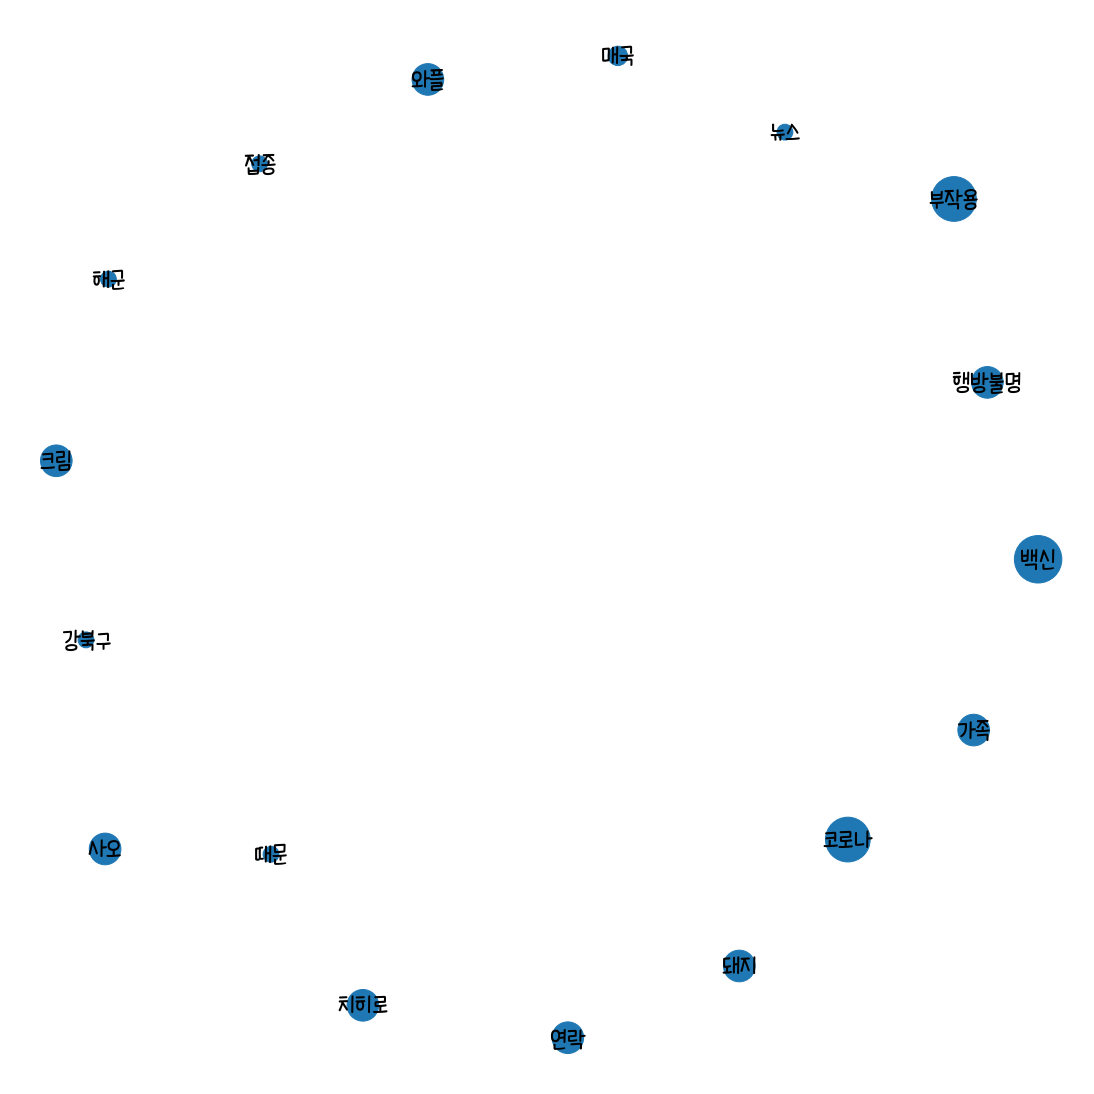

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize']*5)
    
# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
# 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

nx.draw_networkx_labels(G, pos=pos, font_family=font_name, font_size=25)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()